In [52]:
#IMPORTS 
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [53]:
#LOAD DATA
df1 = pd.read_csv('sample_submission.csv')

In [54]:
df1

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [55]:
#LOAD TRAIN DATA
df_test = pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [56]:
#DATA EXPLORATION
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [57]:
#LOAD TRAIN DATA
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [58]:
#DATA EXPLORATION
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
#SHAPE OF DATA
print(f'the train shape {df_train.shape}')
print(f'the test shape {df_test.shape}')

the train shape (1460, 81)
the test shape (1459, 80)


In [60]:
#DATA TYPES
print(f'The unique types for train: {df_train.dtypes.unique().tolist()}')
print(f'The unique types for test: {df_test.dtypes.unique().tolist()}')


The unique types for train: [dtype('int64'), dtype('O'), dtype('float64')]
The unique types for test: [dtype('int64'), dtype('O'), dtype('float64')]


In [61]:
#NUMERICAL COLUMNS
num_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
len(num_cols)

38

In [62]:
#CATEGORICAL COLUMNS
cat_cols = df_train.select_dtypes(include=['object']).columns
len(cat_cols)


43

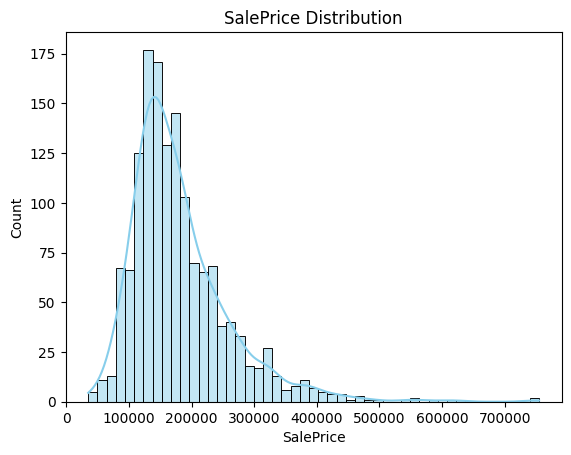

In [63]:
#PLOT SALEPRICE DISTRIBUTION
sns.histplot(df_train['SalePrice'], kde=True, color='skyblue')
plt.title("SalePrice Distribution")
plt.show()

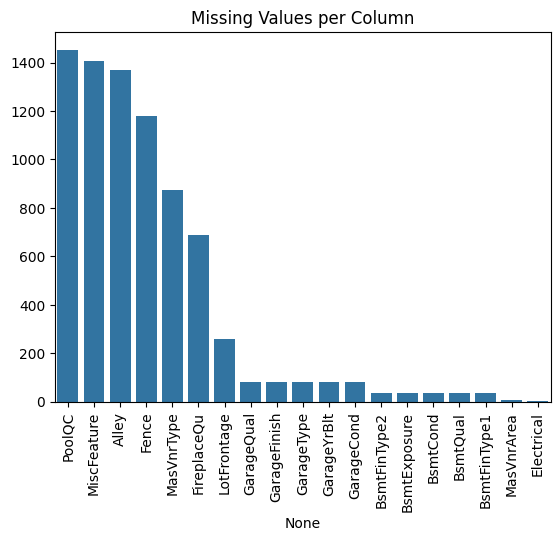

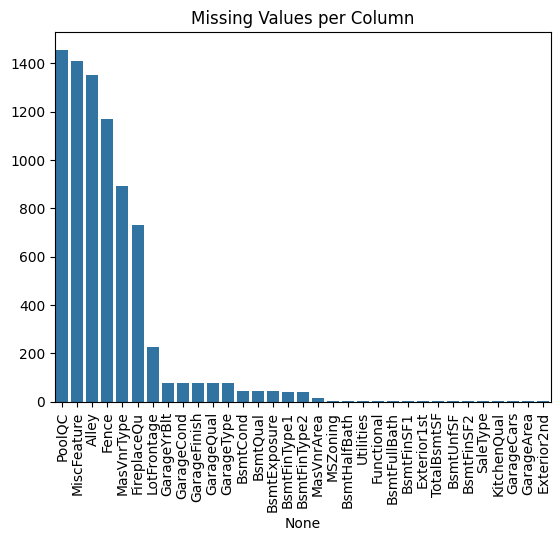

In [64]:
#MISSING VALUES VISUALIZATION
missing = df_train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()

#MISSING VALUES VISUALIZATION
missing = df_test.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()

In [65]:
#TOP 20 COLUMNS WITH MISSING VALUES IN TRAIN DATA
df_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [66]:
#CLEAN MISSING VALUES
def clean_missing_values(df, mode_electrical=None):
    # Drop columns with too many missing values
    drop_cols = ['PoolQC','MiscFeature','Alley','Fence']
    df = df.drop(columns=drop_cols, errors='ignore')

    # Fill specific categorical columns with 'None'
    cat_cols_specified = ['MasVnrType','FireplaceQu','GarageQual','GarageFinish','GarageType','GarageCond',
                          'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
    for col in cat_cols_specified:
        if col in df.columns:
            df[col] = df[col].fillna('None')

    # Fill all other categorical columns with 'None'
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna('None')

    # Fill specific numeric columns with median
    num_cols_specified = ['LotFrontage','GarageYrBlt','MasVnrArea']
    for col in num_cols_specified:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())

    # Fill remaining numeric columns with median
    num_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in num_cols:
        if col not in num_cols_specified:
            df[col] = df[col].fillna(df[col].median())

    # Fill 'Electrical' column with mode
    if 'Electrical' in df.columns:
        if mode_electrical is None:
            df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
        else:
            df['Electrical'] = df['Electrical'].fillna(mode_electrical)

    return df

mode_electrical = df_train['Electrical'].mode()[0]
df_train = clean_missing_values(df_train, mode_electrical)
df_test  = clean_missing_values(df_test, mode_electrical)


In [67]:
#SHAPE OF DATA
print(f'the train shape {df_train.shape}')
print(f'the test shape {df_test.shape}')

the train shape (1460, 77)
the test shape (1459, 76)


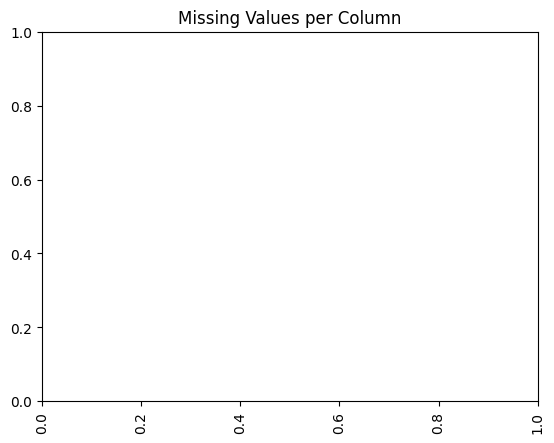

In [68]:
#MISSING VALUES VISUALIZATION
missing = df_train.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.show()


In [69]:
#TOP 20 COLUMNS WITH MISSING VALUES IN TRAIN DATA
df_train.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [70]:
#TOP 20 COLUMNS WITH MISSING VALUES IN TRAIN DATA
df_test.isnull().sum().sort_values(ascending=False).head(20)

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

<h1>Feature_engineering <h1>

In [71]:
def feature_engineering(df):
    # -------------------------
    # 1️⃣ Total house area (basement + 1st + 2nd floor)
    # -------------------------
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

    # -------------------------
    # 2️⃣ House age at the time of sale
    # -------------------------
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['HouseAge'] = df['HouseAge'].apply(lambda x: x if x >= 0 else 0)

    # -------------------------
    # 3️⃣ Garage age (if garage exists)
    # -------------------------
    if 'GarageYrBlt' in df.columns:
        df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
        df['GarageAge'] = df['GarageAge'].apply(lambda x: x if x >= 0 else np.nan)
    else:
        df['GarageAge'] = np.nan

    # -------------------------
    # 4️⃣ Time since last remodeling
    # -------------------------
    df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    df['RemodAge'] = df['RemodAge'].apply(lambda x: x if x >= 0 else 0)

    # -------------------------
    # 5️⃣ Total rooms (above ground + finished basement rooms)
    # -------------------------
    df['TotalRooms'] = df['TotRmsAbvGrd'] + ((df['BsmtFinSF1'] > 0).astype(int) + (df['BsmtFinSF2'] > 0).astype(int))

    # -------------------------
    # 6️⃣ Additional features
    # -------------------------
    # Average room size
    df['AvgRoomSF'] = df['TotalSF'] / (df['TotRmsAbvGrd'] + 1)  # +1 to avoid division by zero

    # Separate basement and 1st floor areas
    df['BasementSF'] = df['TotalBsmtSF']
    df['FirstFlrSF'] = df['1stFlrSF']

    # Binary feature: has garage
    df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0) if 'GarageArea' in df.columns else 0

    # Binary feature: has pool
    df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0) if 'PoolArea' in df.columns else 0

    return df

# Apply feature engineering to train and test sets
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

print(df_train.shape, df_test.shape)


(1460, 87) (1459, 86)


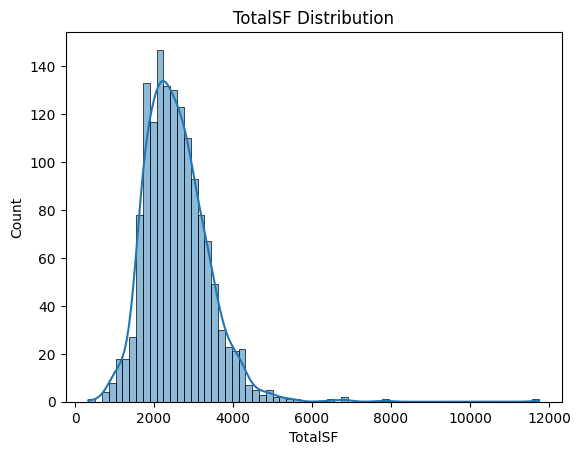

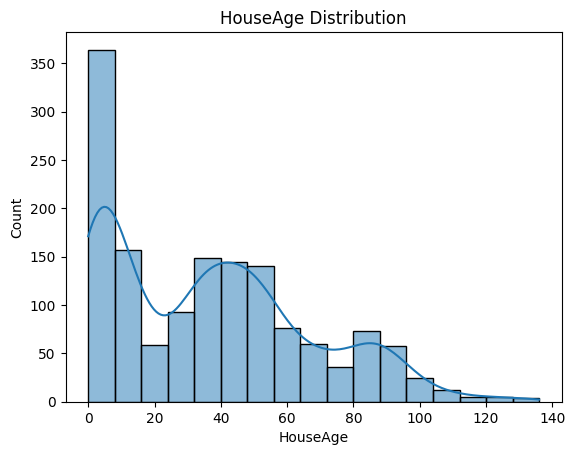

In [72]:
#PLOT NEW FEATURES DISTRIBUTION
sns.histplot(df_train['TotalSF'], kde=True)
plt.title("TotalSF Distribution")
plt.show()
sns.histplot(df_train['HouseAge'], kde=True)
plt.title("HouseAge Distribution")
plt.show()


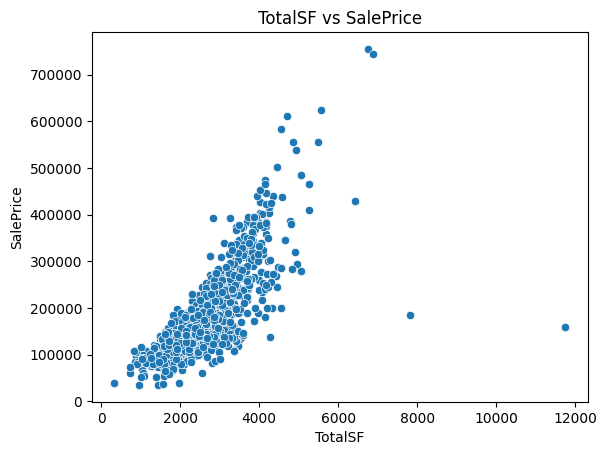

In [73]:
#PLOT NEW FEATURES AGAINST SALEPRICE
sns.scatterplot(x='TotalSF', y='SalePrice', data=df_train)
plt.title("TotalSF vs SalePrice")
plt.show()


## Encoding 

In [74]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical(train_df, test_df, top_n_high_card=5):
    df_train = train_df.copy()
    df_test = test_df.copy()
    label_encoders = {}

    categorical_cols = df_train.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        n_unique = df_train[col].nunique()

        if n_unique == 2:
            # Binary columns → Label Encoding
            le = LabelEncoder()
            df_train[col] = le.fit_transform(df_train[col].fillna('None'))

            # For test set: replace unseen values with first class
            df_test[col] = df_test[col].fillna('None')
            df_test[col] = df_test[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
            df_test[col] = le.transform(df_test[col])

            label_encoders[col] = le

        elif n_unique <= 10:
            # Small cardinality → One-Hot Encoding
            df_train = pd.get_dummies(df_train, columns=[col], drop_first=False, dtype=int)
            df_test = pd.get_dummies(df_test, columns=[col], drop_first=False, dtype=int)

            # Align test columns with train columns
            missing_cols = set(df_train.columns) - set(df_test.columns)
            for c in missing_cols:
                df_test[c] = 0
            df_test = df_test[df_train.columns]

        else:
            # High cardinality → Top N categories vs rest
            top_categories = df_train[col].value_counts().nlargest(top_n_high_card).index
            for cat in top_categories:
                df_train[f'{col}_{cat}'] = (df_train[col] == cat).astype(int)
                df_test[f'{col}_{cat}'] = (df_test[col] == cat).astype(int)
            df_train.drop(col, axis=1, inplace=True)
            df_test.drop(col, axis=1, inplace=True)

    return df_train, df_test, label_encoders

# Apply categorical encoding
df_train_enc, df_test_enc, label_encoders = encode_categorical(df_train, df_test)
print(df_train_enc.shape, df_test_enc.shape)


(1460, 254) (1459, 254)


In [75]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,TotalSF,HouseAge,GarageAge,RemodAge,TotalRooms,AvgRoomSF,BasementSF,FirstFlrSF,HasGarage,HasPool
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2566,5,5.0,5,9,285.111111,856,856,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2524,31,31.0,31,7,360.571429,1262,1262,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2706,7,7.0,6,7,386.571429,920,920,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2473,91,8.0,36,8,309.125000,756,961,1,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3343,8,8.0,8,10,334.300000,1145,1145,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2600,8,8.0,7,7,325.000000,953,953,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,3615,32,32.0,22,9,451.875000,1542,2073,1,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,3492,69,69.0,4,10,349.200000,1152,1188,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2156,60,60.0,14,7,359.333333,1078,1078,1,0


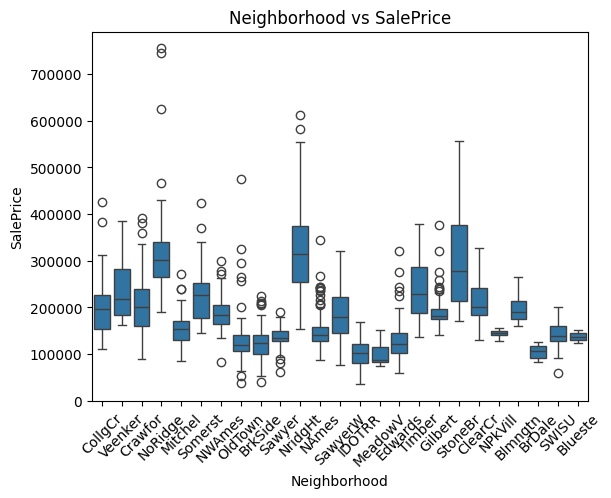

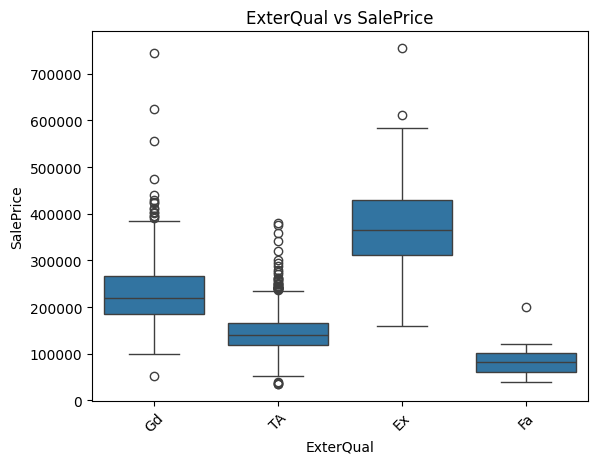

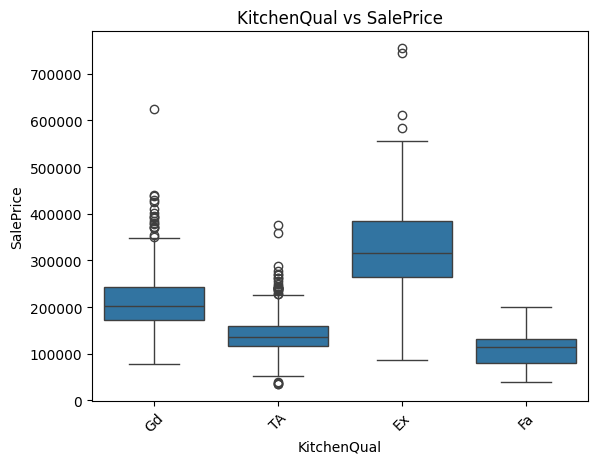

In [76]:
#PLOT CATEGORICAL FEATURES AGAINST SALEPRICE
cat_features = ['Neighborhood','ExterQual','KitchenQual']
for col in cat_features:
    sns.boxplot(x=col, y='SalePrice', data=df_train)
    plt.xticks(rotation=45)
    plt.title(f"{col} vs SalePrice")
    plt.show()


### Feature Selection using Random Forest Importance

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Copy train dataset to avoid modifying original
df = df_train.copy()

# Separate target
y = df["SalePrice"]
X = df.drop(["SalePrice", "Id"], axis=1)

# -----------------------
# 1️⃣ Encode categorical features
# -----------------------
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# -----------------------
# 2️⃣ Split into train and validation sets
# -----------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# -----------------------
# 3️⃣ Train RandomForestRegressor
# -----------------------
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# -----------------------
# 4️⃣ Compute feature importances
# -----------------------
importances = pd.Series(rf.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=False)

# Display top-20 features
print("Top-20 features by importance:\n", importances.head(20))

# -----------------------
# 5️⃣ Save top features list for future use
# -----------------------
top_features = importances.head(20).index.tolist()


Top-20 features by importance:
 TotalSF           0.385190
OverallQual       0.373454
2ndFlrSF          0.025921
YearBuilt         0.013967
LotFrontage       0.011873
HouseAge          0.011697
GarageCars        0.011611
LotArea           0.011402
BsmtFinSF1        0.011350
GrLivArea         0.010108
GarageArea        0.008092
RemodAge          0.006563
BsmtUnfSF         0.006540
YearRemodAdd      0.006285
OverallCond       0.004721
KitchenQual_Gd    0.004678
BsmtQual_Gd       0.004131
GarageYrBlt       0.003664
WoodDeckSF        0.003493
OpenPorchSF       0.003470
dtype: float64


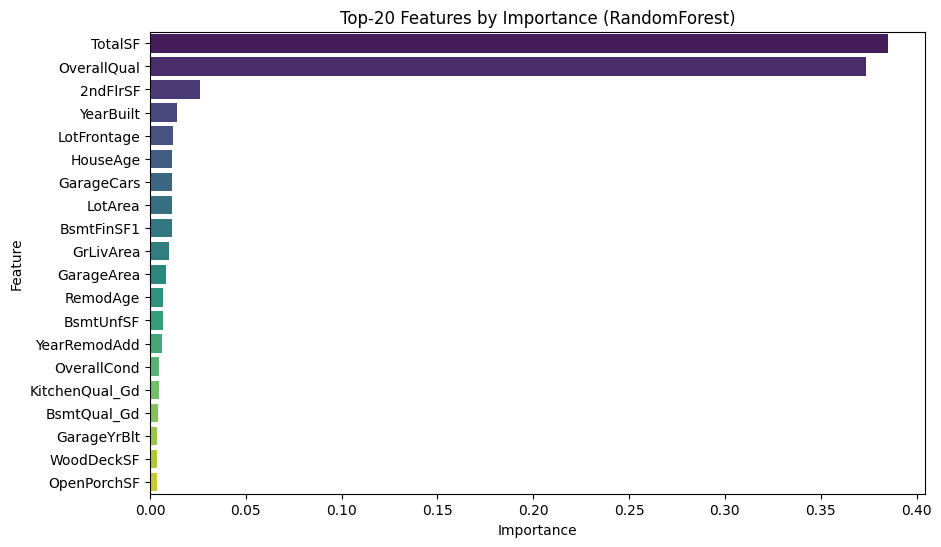

In [78]:
#PLOT FEATURE IMPORTANCES
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 20 features
top20 = importances.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top20.values,
    y=top20.index,
    hue=top20.index,  # set hue for color palette
    dodge=False,
    palette="viridis",
    legend=False
)
plt.title("Top-20 Features by Importance (RandomForest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


## Outlier Handling: IQR Method

In [79]:
def remove_outliers_iqr(df, columns, factor=2):
    """
    Remove rows where values in the specified columns are outside IQR * factor.
    Checks all columns simultaneously for safer removal.
    """
    df_clean = df.copy()
    mask = pd.Series(True, index=df_clean.index)
    
    for col in columns:
        if col not in df_clean.columns:
            continue
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        mask &= df_clean[col].between(lower_bound, upper_bound)
        print(f"{col}: removing rows outside [{lower_bound:.2f}, {upper_bound:.2f}]")
    
    before = df_clean.shape[0]
    df_clean = df_clean[mask]
    after = df_clean.shape[0]
    print(f"Total rows removed: {before - after}")
    return df_clean

# Take top-10 features by importance
top_features = importances.head(10).index.tolist()

# Remove outliers based on these columns
df_train_no_outliers = remove_outliers_iqr(df_train, top_features)

print("Train shape before removing outliers:", df_train.shape)
print("Train shape after removing outliers:", df_train_no_outliers.shape)


TotalSF: removing rows outside [20.50, 4993.00]
OverallQual: removing rows outside [1.00, 11.00]
2ndFlrSF: removing rows outside [-1456.00, 2184.00]
YearBuilt: removing rows outside [1862.00, 2092.00]
LotFrontage: removing rows outside [22.00, 117.00]
HouseAge: removing rows outside [-84.00, 146.00]
GarageCars: removing rows outside [-1.00, 4.00]
LotArea: removing rows outside [-542.50, 19697.50]
BsmtFinSF1: removing rows outside [-1424.50, 2136.75]
GrLivArea: removing rows outside [-165.00, 3071.25]
Total rows removed: 120
Train shape before removing outliers: (1460, 87)
Train shape after removing outliers: (1340, 87)


In [80]:
df_train_no_outliers

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,TotalSF,HouseAge,GarageAge,RemodAge,TotalRooms,AvgRoomSF,BasementSF,FirstFlrSF,HasGarage,HasPool
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2566,5,5.0,5,9,285.111111,856,856,1,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,2524,31,31.0,31,7,360.571429,1262,1262,1,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,2706,7,7.0,6,7,386.571429,920,920,1,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2473,91,8.0,36,8,309.125000,756,961,1,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,3343,8,8.0,8,10,334.300000,1145,1145,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,2600,8,8.0,7,7,325.000000,953,953,1,0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,3615,32,32.0,22,9,451.875000,1542,2073,1,0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,3492,69,69.0,4,10,349.200000,1152,1188,1,0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,2156,60,60.0,14,7,359.333333,1078,1078,1,0


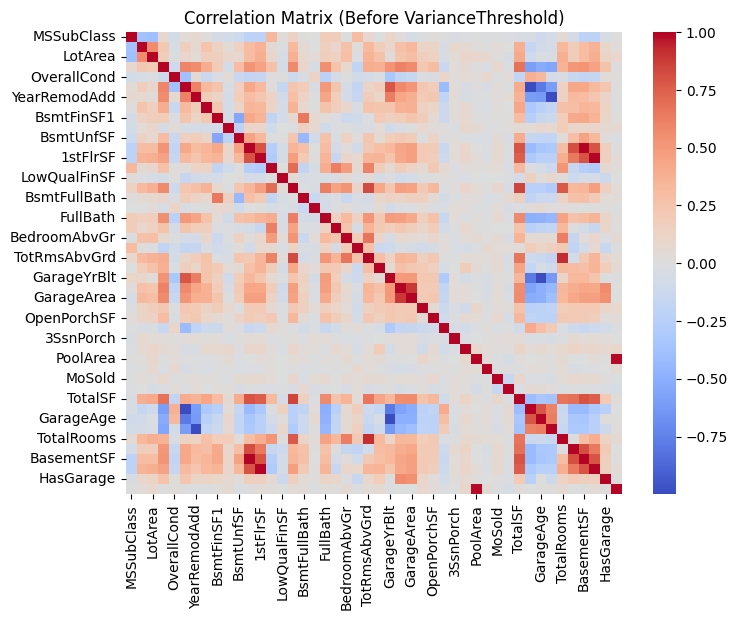

In [81]:
#PLOT CORRELATION MATRIX BEFORE VARIANCETHRESHOLD
corr_before_var = df_train_no_outliers.select_dtypes(include=['int64', 'float64']).drop(["SalePrice", "Id"], axis=1).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_before_var, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Before VarianceThreshold)")
plt.show()

In [82]:
#FEATURE SELECTION

# -------------------------------
# 1. Remove features with near-zero variance
# -------------------------------
num_cols = df_train_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols = [c for c in num_cols if c not in ["SalePrice", "Id"]]

selector = VarianceThreshold(threshold=0.01)
selector.fit(df_train_no_outliers[num_cols])

# Keep only columns with sufficient variance
cols_to_keep = df_train_no_outliers[num_cols].columns[selector.get_support()]
df_train_var = df_train_no_outliers[cols_to_keep.tolist() + ["SalePrice", "Id"]]

print("Shape after VarianceThreshold:", df_train_var.shape)

# -------------------------------
# 2. Remove highly correlated features
# -------------------------------
corr_matrix = df_train_var.drop(["SalePrice", "Id"], axis=1).corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]

df_train_final = df_train_var.drop(columns=to_drop)
print(f"Removed {len(to_drop)} highly correlated features")
print("Final train shape:", df_train_final.shape)


Shape after VarianceThreshold: (1340, 47)
Removed 6 highly correlated features
Final train shape: (1340, 41)


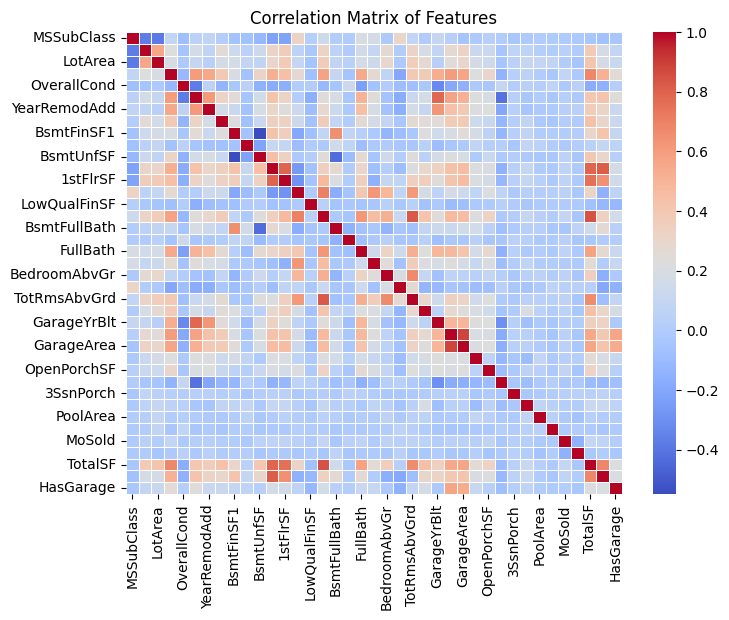

In [83]:
#PLOT CORRELATION MATRIX AFTER FEATURE SELECTION
import seaborn as sns
import matplotlib.pyplot as plt

# correlation matrix (numeric features, բացի target և Id)
corr_matrix = df_train_final.drop(["SalePrice", "Id"], axis=1).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [84]:
df_train_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,AvgRoomSF,HasGarage,SalePrice,Id
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,2,2008,2566,285.111111,1,208500,1
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,5,2007,2524,360.571429,1,181500,2
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,9,2008,2706,386.571429,1,223500,3
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,2,2006,2473,309.125000,1,140000,4
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,12,2008,3343,334.300000,1,250000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,8,2007,2600,325.000000,1,175000,1456
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,2,2010,3615,451.875000,1,210000,1457
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,2500,5,2010,3492,349.200000,1,266500,1458
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,4,2010,2156,359.333333,1,142125,1459


In [85]:
#FEATURE SELECTION USING RANDOM FOREST IMPORTANCE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Copy of the train dataset
df = df_train_final.copy()

# Target
y = df["SalePrice"]
X = df.drop(["SalePrice", "Id"], axis=1)

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# RandomForest to get feature importance
rf = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select Top 11 features
top_features = importances.head(11).index.tolist()
print("Top features:\n", top_features)

# Create train/val sets with only top features
X_train_top = X_train[top_features]
X_val_top   = X_val[top_features]


Top features:
 ['TotalSF', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageArea', 'LotArea', 'BsmtUnfSF', 'BsmtFinSF1', 'OverallCond', '1stFlrSF']


In [86]:
X_train_top

,TotalSF,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,GarageArea,LotArea,BsmtUnfSF,BsmtFinSF1,OverallCond,1stFlrSF
1247,2046,6,1976,1976,1034,888,12328,473,539,5,1034
874,1807,5,1941,1950,1131,200,5720,676,0,6,676
1403,2949,8,2007,2007,1464,754,15256,556,929,5,1464
642,4656,8,1972,1995,2704,538,13860,542,1410,7,2000
1293,2496,7,1976,1976,1664,528,10140,638,194,5,832
...,...,...,...,...,...,...,...,...,...,...,...
1192,2174,5,1925,1994,1472,250,9600,702,0,8,842
1229,2582,5,1960,1960,1507,404,7910,409,666,5,1507
1411,2524,6,1950,2005,1668,271,9600,736,120,8,1112
932,3810,9,2006,2006,1905,788,11670,1905,0,5,1905


In [87]:
X_val_top

,TotalSF,OverallQual,YearBuilt,YearRemodAdd,GrLivArea,GarageArea,LotArea,BsmtUnfSF,BsmtFinSF1,OverallCond,1stFlrSF
428,2416,7,2007,2007,1208,628,6762,544,664,5,1208
956,1790,6,1980,1980,1229,462,1300,276,285,6,561
389,4014,10,2007,2008,2332,846,12474,402,1280,5,1742
398,2038,5,1920,1950,1077,338,8967,961,0,2,1077
282,2628,7,2007,2008,1314,626,5063,410,904,5,1314
...,...,...,...,...,...,...,...,...,...,...,...
115,2187,6,1999,1999,1458,440,3230,310,419,5,729
886,3338,5,1959,2005,1712,588,8393,1098,528,5,1712
586,1654,6,1918,2000,838,275,10267,0,210,7,838
1402,2580,7,2006,2006,1294,662,6762,1286,0,5,1294


## Model Evaluation: Linear Regression with K-Fold Cross-Validation

In [88]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from math import sqrt

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []
rmse_list = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_top), 1):
    X_tr, X_val_fold = X_train_top.iloc[train_idx], X_train_top.iloc[val_idx]
    y_tr, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    lr = LinearRegression()
    lr.fit(X_tr, y_tr)

    y_pred = lr.predict(X_val_fold)
    
    mse = mean_squared_error(y_val_fold, y_pred)
    r2 = r2_score(y_val_fold, y_pred)
    rmse = sqrt(mse)
    
    mse_list.append(mse)
    r2_list.append(r2)
    rmse_list.append(rmse)
    
    print(f"Fold {fold}: MSE = {mse:.2f}, RMSE = {rmse:.2f}, R2 = {r2:.4f}")

print(f"\nMean MSE: {np.mean(mse_list):.2f} ± {np.std(mse_list):.2f}")
print(f"Mean RMSE: {np.mean(rmse_list):.2f} ± {np.std(rmse_list):.2f}")
print(f"Mean R2: {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")


Fold 1: MSE = 805107441.66, RMSE = 28374.42, R2 = 0.8576
Fold 2: MSE = 757972769.88, RMSE = 27531.31, R2 = 0.8592
Fold 3: MSE = 663307542.20, RMSE = 25754.76, R2 = 0.8627
Fold 4: MSE = 604857536.64, RMSE = 24593.85, R2 = 0.8507
Fold 5: MSE = 960980228.26, RMSE = 30999.68, R2 = 0.7909

Mean MSE: 758445103.73 ± 123157110.98
Mean RMSE: 27450.80 ± 2213.27
Mean R2: 0.8442 ± 0.0269


## Model Comparison: Log Transformation Impact

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import numpy as np

# 1️⃣ Log-transform the target
y_train_log = np.log1p(y_train)  # log(1 + SalePrice)

# 2️⃣ Linear Regression on log-transformed target
lr_log = LinearRegression()
lr_log.fit(X_train_top, y_train_log)

# Predictions on validation set (back to original scale)
y_pred_log = lr_log.predict(X_val_top)
y_pred_log_exp = np.expm1(y_pred_log)

mse_log = mean_squared_error(y_val, y_pred_log_exp)
rmse_log = sqrt(mse_log)
r2_log  = r2_score(y_val, y_pred_log_exp)

print(f"Linear Regression (log-transformed): MSE = {mse_log:.2f}, RMSE = {rmse_log:.2f}, R2 = {r2_log:.4f}")

# 3️⃣ Linear Regression without log-transform
lr = LinearRegression()
lr.fit(X_train_top, y_train)

y_pred_original = lr.predict(X_val_top)
mse_original = mean_squared_error(y_val, y_pred_original)
rmse_original = sqrt(mse_original)
r2_original  = r2_score(y_val, y_pred_original)

print(f"Linear Regression (original): MSE = {mse_original:.2f}, RMSE = {rmse_original:.2f}, R2 = {r2_original:.4f}")


Linear Regression (log-transformed): MSE = 476361295.18, RMSE = 21825.70, R2 = 0.9086
Linear Regression (original): MSE = 767657445.24, RMSE = 27706.63, R2 = 0.8528


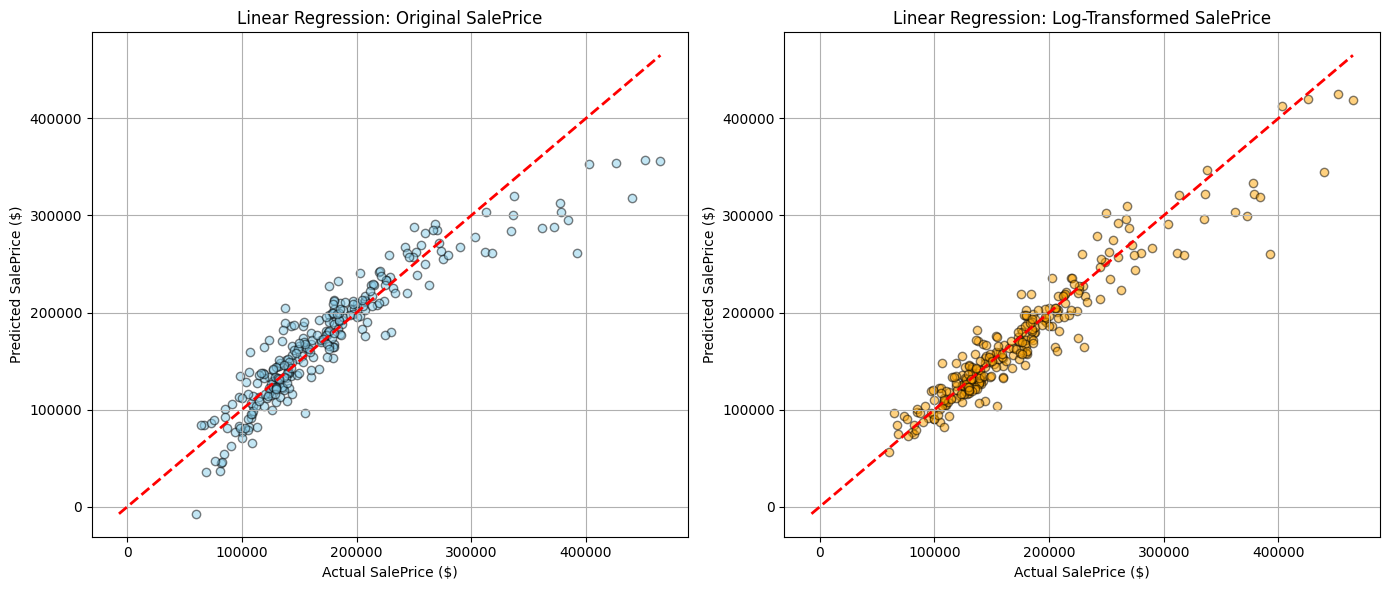

In [90]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 1️⃣ Predictions
# Original model
y_pred_orig = lr.predict(X_val_top)

# Log-transformed model
lr_log = LinearRegression()
lr_log.fit(X_train_top, np.log1p(y_train))  # train with log(target)
y_pred_log_exp = np.expm1(lr_log.predict(X_val_top))  # back to original $

# 2️⃣ Plot setup
plt.figure(figsize=(14,6))

# Common axis range for comparison
min_val = min(y_val.min(), y_pred_orig.min(), y_pred_log_exp.min())
max_val = max(y_val.max(), y_pred_orig.max(), y_pred_log_exp.max())

# 2.1 Original SalePrice
plt.subplot(1,2,1)
plt.scatter(y_val, y_pred_orig, alpha=0.5, color='skyblue', edgecolor='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual SalePrice ($)')
plt.ylabel('Predicted SalePrice ($)')
plt.title('Linear Regression: Original SalePrice')
plt.grid(True)

# 2.2 Log-transformed SalePrice
plt.subplot(1,2,2)
plt.scatter(y_val, y_pred_log_exp, alpha=0.5, color='orange', edgecolor='k')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual SalePrice ($)')
plt.ylabel('Predicted SalePrice ($)')
plt.title('Linear Regression: Log-Transformed SalePrice')
plt.grid(True)

plt.tight_layout()
plt.show()


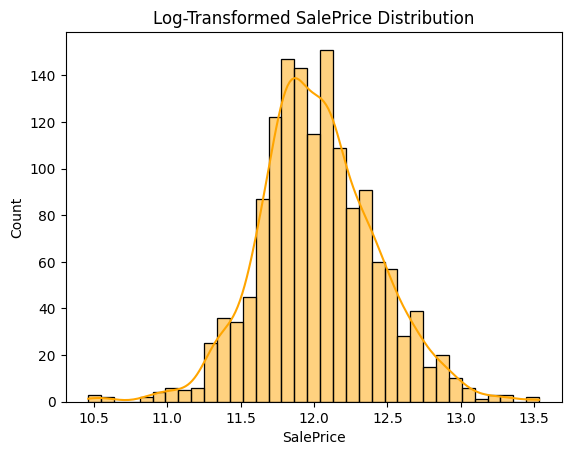

In [91]:
sns.histplot(np.log1p(df_train['SalePrice']), kde=True, color='orange')
plt.title("Log-Transformed SalePrice Distribution")
plt.show()


## Advanced Modeling: Regularization and XGBoost

In [92]:
import numpy as np
import pandas as pd

# 1️⃣ Align test set columns with train set
X_test_top = df_test.reindex(columns=X_train_top.columns, fill_value=0)

# 2️⃣ Convert numeric columns to float
num_cols_to_scale_test = X_test_top.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_test_top[num_cols_to_scale_test] = X_test_top[num_cols_to_scale_test].astype(float)

# If a scaler was used, you can transform here
# X_test_top[num_cols_to_scale_test] = scaler.transform(X_test_top[num_cols_to_scale_test])

# 3️⃣ Predict on test using log1p-trained model
y_test_pred_log = lr_log.predict(X_test_top)
y_test_pred = np.expm1(y_test_pred_log)  # back to original dollars

# 4️⃣ Create submission DataFrame
submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': y_test_pred
})

# 5️⃣ Print first few predictions
print("First rows of predictions:")
print(submission.head())

# 6️⃣ Compare with real SalePrice if available
# df1['SalePrice'] - actual values from Kaggle (optional)
if 'df1' in globals():
    print("\nFirst rows of actual SalePrice (df1):")
    print(df1['SalePrice'].head())


First rows of predictions:
     Id      SalePrice
0  1461  130004.668096
1  1462  164513.673079
2  1463  178343.046700
3  1464  191835.647254
4  1465  187230.409163

First rows of actual SalePrice (df1):
0    169277.052498
1    187758.393989
2    183583.683570
3    179317.477511
4    150730.079977
Name: SalePrice, dtype: float64


In [93]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1️⃣ RidgeCV: alpha selection with cross-validation
ridge_alphas = np.logspace(-3, 3, 50)  # 0.001 to 1000
ridge_cv = RidgeCV(alphas=ridge_alphas, cv=5)
ridge_cv.fit(X_train_top, y_train)

y_pred_ridge = ridge_cv.predict(X_val_top)
mse_ridge = mean_squared_error(y_val, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_val, y_pred_ridge)

print(f"Ridge: alpha={ridge_cv.alpha_:.4f}, RMSE={rmse_ridge:.2f}, R2={r2_ridge:.4f}")

# 2️⃣ LassoCV: alpha selection with cross-validation
lasso_alphas = np.logspace(-3, 1, 50)  # 0.001 to 10
lasso_cv = LassoCV(alphas=lasso_alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_top, y_train)

y_pred_lasso = lasso_cv.predict(X_val_top)
mse_lasso = mean_squared_error(y_val, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_val, y_pred_lasso)

print(f"Lasso: alpha={lasso_cv.alpha_:.4f}, RMSE={rmse_lasso:.2f}, R2={r2_lasso:.4f}")


Ridge: alpha=6.2506, RMSE=27720.16, R2=0.8526
Lasso: alpha=10.0000, RMSE=27708.04, R2=0.8528


In [94]:
# pip install xgboost

In [95]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Prepare DMatrix for XGBoost
# Log-transform target
y_train_log = np.log1p(y_train)

# DMatrix for training and validation
dtrain = xgb.DMatrix(X_train_top, label=y_train_log)
dval   = xgb.DMatrix(X_val_top, label=np.log1p(y_val))

# DMatrix for test set
X_test_top_aligned = df_test.reindex(columns=X_train_top.columns, fill_value=0)
num_cols_test = X_test_top_aligned.select_dtypes(include=['int64', 'float64']).columns.tolist()
X_test_top_aligned[num_cols_test] = X_test_top_aligned[num_cols_test].astype(float)
dtest  = xgb.DMatrix(X_test_top_aligned)


In [96]:
# 2️⃣ XGBoost parameters
params = {
    "objective": "reg:squarederror",  # regression
    "eval_metric": "rmse",             # RMSE metric
    "eta": 0.01,                       # learning rate
    "max_depth": 6,                    # tree depth
    "subsample": 0.8,                  # random row sampling
    "colsample_bytree": 0.8,           # random feature sampling
    "seed": 42
}

# 3️⃣ Training with early stopping
evallist = [(dtrain, "train"), (dval, "eval")]

xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=5000,             # large number of boosting rounds
    evals=evallist,
    early_stopping_rounds=100,        # stop if no improvement after 100 rounds
    verbose_eval=100
)


[0]	train-rmse:0.37659	eval-rmse:0.37552
[100]	train-rmse:0.18006	eval-rmse:0.19302
[200]	train-rmse:0.10618	eval-rmse:0.13363
[300]	train-rmse:0.07763	eval-rmse:0.11693
[400]	train-rmse:0.06440	eval-rmse:0.11153
[500]	train-rmse:0.05690	eval-rmse:0.10952
[600]	train-rmse:0.05116	eval-rmse:0.10892
[700]	train-rmse:0.04646	eval-rmse:0.10852
[800]	train-rmse:0.04241	eval-rmse:0.10832
[900]	train-rmse:0.03860	eval-rmse:0.10821
[1000]	train-rmse:0.03531	eval-rmse:0.10823
[1009]	train-rmse:0.03508	eval-rmse:0.10824


In [97]:
from sklearn.metrics import mean_squared_error, r2_score

# 4️⃣ Predictions on validation set
y_val_pred_log = xgb_model.predict(dval)
y_val_pred = np.expm1(y_val_pred_log)  # convert back from log scale

# Metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"XGBoost (log-transformed target): RMSE = {rmse:.2f}, R2 = {r2:.4f}")


XGBoost (log-transformed target): RMSE = 20629.09, R2 = 0.9184


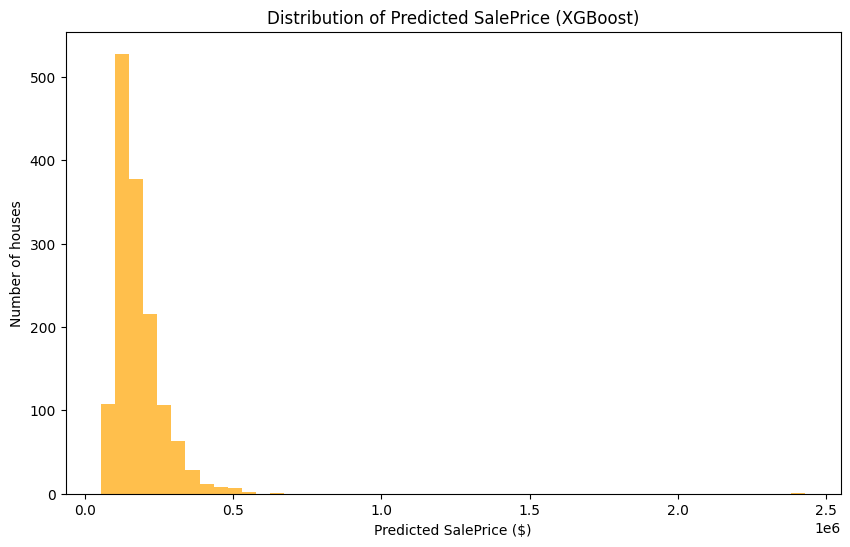

In [98]:
# 6️⃣ Visualization of predicted SalePrice distribution
plt.figure(figsize=(10,6))
plt.hist(submission["SalePrice"], bins=50, color="orange", alpha=0.7)
plt.xlabel("Predicted SalePrice ($)")
plt.ylabel("Number of houses")
plt.title("Distribution of Predicted SalePrice (XGBoost)")
plt.show()


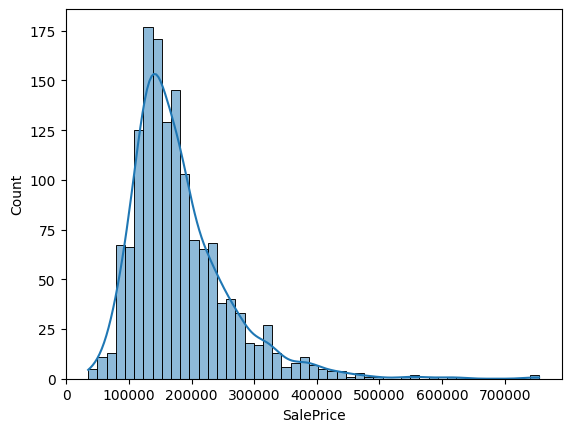

In [99]:
sns.histplot(df_train['SalePrice'], kde=True)
plt.show()

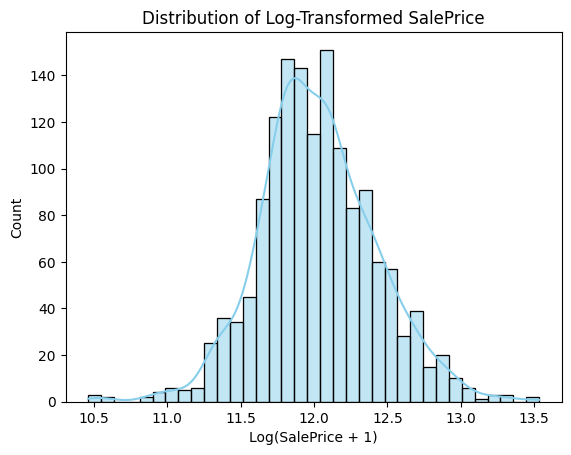

In [100]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(np.log1p(df_train['SalePrice']), kde=True, color='skyblue')
plt.xlabel('Log(SalePrice + 1)')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()


In [101]:
# ✅ Final CSV for Kaggle submission
submission = pd.DataFrame({
    "Id": df_test["Id"],
    "SalePrice": y_test_pred
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("submission.csv file successfully created!")
print(submission.head())


submission.csv file successfully created!
     Id      SalePrice
0  1461  130004.668096
1  1462  164513.673079
2  1463  178343.046700
3  1464  191835.647254
4  1465  187230.409163
